# Import Libraries and Load Data
Import pandas and load the diabetes dataset with specified column names using pd.read_csv()

In [1]:
#import pandas
import pandas as pd

# Define column names as per dataset description
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

# Load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

# Display the first few rows
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


# Data Exploration and Preprocessing
Display first few rows of data, check data info and basic statistics using head(), info(), describe()

In [2]:
# Display the first few rows of the dataset
print("First 5 rows of the dataset:")
print(pima.head())

# Display information about the dataset
print("\nDataset Information:")
print(pima.info())

# Display basic statistics of the dataset
print("\nBasic Statistics of the dataset:")
print(pima.describe())

First 5 rows of the dataset:
      pregnant  glucose             bp           skin  insulin   bmi  \
0  Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
1            6      148             72             35        0  33.6   
2            1       85             66             29        0  26.6   
3            8      183             64              0        0  23.3   
4            1       89             66             23       94  28.1   

                   pedigree  age    label  
0  DiabetesPedigreeFunction  Age  Outcome  
1                     0.627   50        1  
2                     0.351   31        0  
3                     0.672   32        1  
4                     0.167   21        0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 769 entries, 0 to 768
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pregnant  769 non-null    object
 1   glucose   769 non-null    obj

# Feature Selection
Select feature columns and target variable for model training

In [3]:
# Select feature columns and target variable for model training
feature_cols = ['pregnant', 'insulin', 'bmi', 'age', 'glucose', 'bp', 'pedigree']
X = pima[feature_cols]  # Features
y = pima['label']  # Target variable

# Display the first few rows of the features and target variable
print("First 5 rows of the features:")
print(X.head())
print("\nFirst 5 rows of the target variable:")
print(y.head())

First 5 rows of the features:
      pregnant  insulin   bmi  age  glucose             bp  \
0  Pregnancies  Insulin   BMI  Age  Glucose  BloodPressure   
1            6        0  33.6   50      148             72   
2            1        0  26.6   31       85             66   
3            8        0  23.3   32      183             64   
4            1       94  28.1   21       89             66   

                   pedigree  
0  DiabetesPedigreeFunction  
1                     0.627  
2                     0.351  
3                     0.672  
4                     0.167  

First 5 rows of the target variable:
0    Outcome
1          1
2          0
3          1
4          0
Name: label, dtype: object


# Train Test Split
Split data into training and testing sets using train_test_split from sklearn

In [4]:
# Split data into training and testing sets
from sklearn.model_selection import train_test_split

# Split X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

# Display the shape of the training and testing sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (576, 7)
Shape of X_test: (193, 7)
Shape of y_train: (576,)
Shape of y_test: (193,)


# Model Training
Create and train LogisticRegression model on the training data

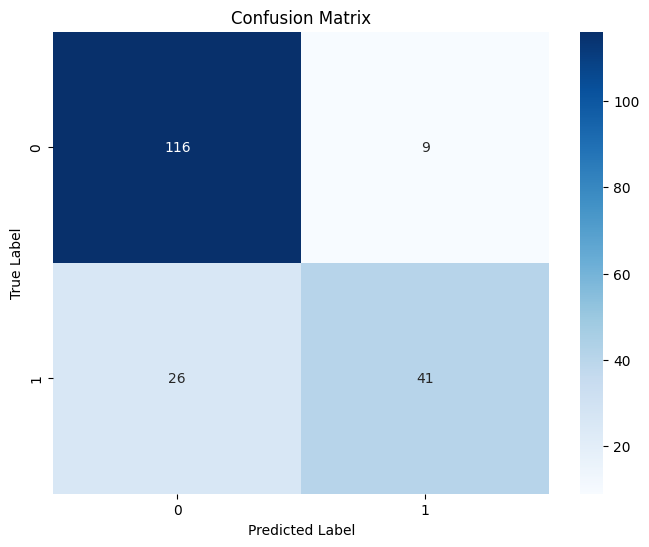


Classification Report:
              precision    recall  f1-score   support

 No Diabetes       0.82      0.93      0.87       125
    Diabetes       0.82      0.61      0.70        67

    accuracy                           0.82       192
   macro avg       0.82      0.77      0.78       192
weighted avg       0.82      0.82      0.81       192


Detailed Metrics:
Precision: 0.82
Recall: 0.61
F1-Score: 0.70


In [8]:


# Import additional libraries for evaluation and visualization
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Create confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=['No Diabetes', 'Diabetes']))

# Calculate and print specific metrics
from sklearn.metrics import precision_score, recall_score, f1_score
print("\nDetailed Metrics:")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.2f}")

# Model Evaluation
Generate confusion matrix and classification report to evaluate model performance

Confusion Matrix:
[[116   9]
 [ 26  41]]


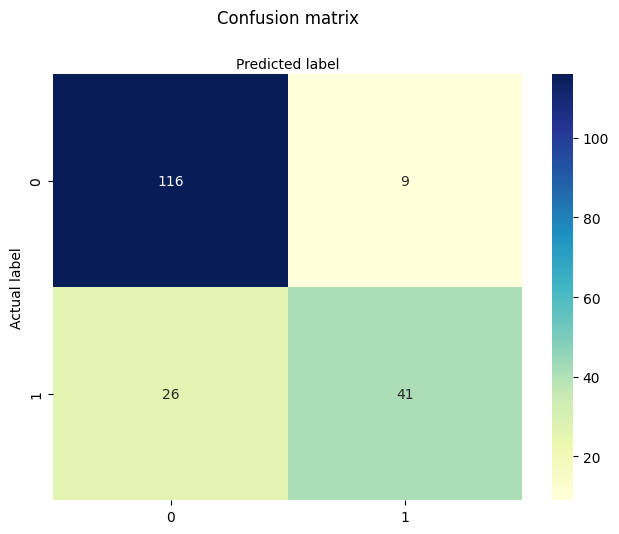


Classification Report:
                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       125
   with diabetes       0.82      0.61      0.70        67

        accuracy                           0.82       192
       macro avg       0.82      0.77      0.78       192
    weighted avg       0.82      0.82      0.81       192



In [9]:
#import the metrics class
from sklearn import metrics

# Generate the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cnf_matrix)

# Visualize the confusion matrix using a heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0, 1]  # Name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# Evaluate the model using classification_report for accuracy, precision, and recall
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

# Visualization of Results
Create heatmap visualization of confusion matrix using seaborn

Confusion Matrix:
[[116   9]
 [ 26  41]]


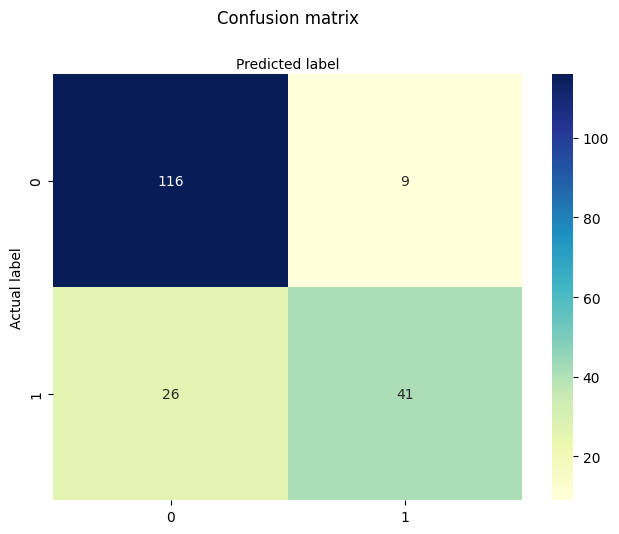

In [10]:
#import the metrics class
from sklearn import metrics

# Generate the confusion matrix
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cnf_matrix)

# Visualize the confusion matrix using a heatmap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names = [0, 1]  # Name of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [11]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[116,   9],
       [ 26,  41]])

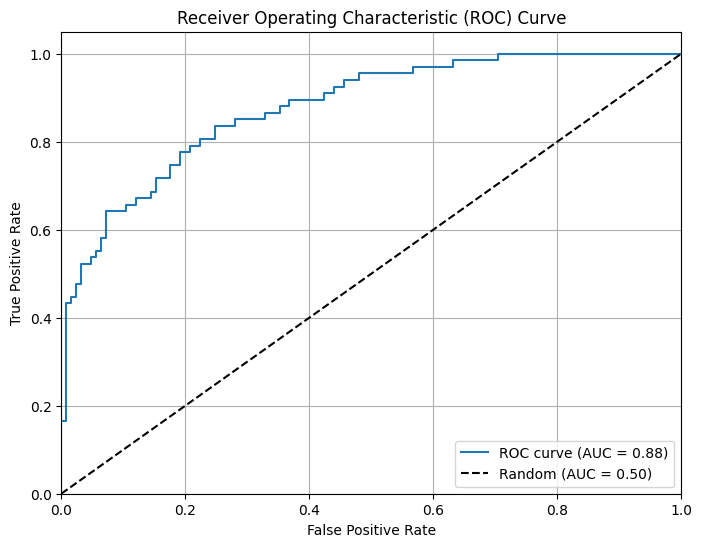

In [12]:
# Calculate prediction probabilities
y_pred_proba = logreg.predict_proba(X_test)[:,1]

# Calculate ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random (AUC = 0.50)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()